<a href="https://colab.research.google.com/github/YesidCastelblanco/Taller_aprendizaje_automatico/blob/main/Copia_de_Copia_de_Examen1_Ejercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 1

### Integrantes

- Yesid Castelblanco
- Andres Felipe Borrero
- Carlos Alberto Martinez Ramirez
- Nicolas Colmenares

### **Profesores**

- Santiago Ortiz
- Henry Velasco

Fecha: _ de 2024



---


# Ejercicio 4


---



## Datos

**publicidad.csv**

## Puntos

1. Graficar el retorno de la inversión **Sales** vs **TV, Radio, Newspaper**.
  - Usar scatter_matrix()
  - Interpretar graficos de las variables 2 a 2.
2. Calcular coeficiente de correlación.
  - Graficar mapa de calor de las correlaciones.
  - Interpretar las estructuras de dependencia encontradas.
3. Escoger una de las 3 variables para modelar las ventas.
  - Ajustar modelo de regresión lineal simple y encontrar la ecuación de la recta
  - ¿Cuál es el valor del coeficiente de determinación ${𝑅}^2$.
  - ¿Cómo se interpreta este valor?
4. Realizar una predicción del retorno a la inversión al realizar 5 anuncios.
  - ¿Cuál es el intervalo de confianza del 95% para la predicción?

In [118]:
# Importamos las bibliotecas necesarias


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm



In [119]:
# Leemos el archivo PUBLICIDAD.CSV y lo cargamos en un DataFrame de Pandas

df = pd.read_csv('https://raw.githubusercontent.com/cam2149/MachinelearningI/refs/heads/main/publicidad.csv')




In [120]:
# Realizamos un filtro al df dejando solo los campos que se van a analizar

df_filtro = df[["TV","Radio","Newspaper","Sales"]]



In [121]:
# Consultamos el df con el filtro
df_filtro.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [122]:
print(df_filtro.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [123]:
df_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB



# ***1)  GRAFICAR EL RETORNO DE LA INVERSIÓN SALES VS TV, RADIO, NEWSPAPER.***

# **Usar scatter_matrix()**

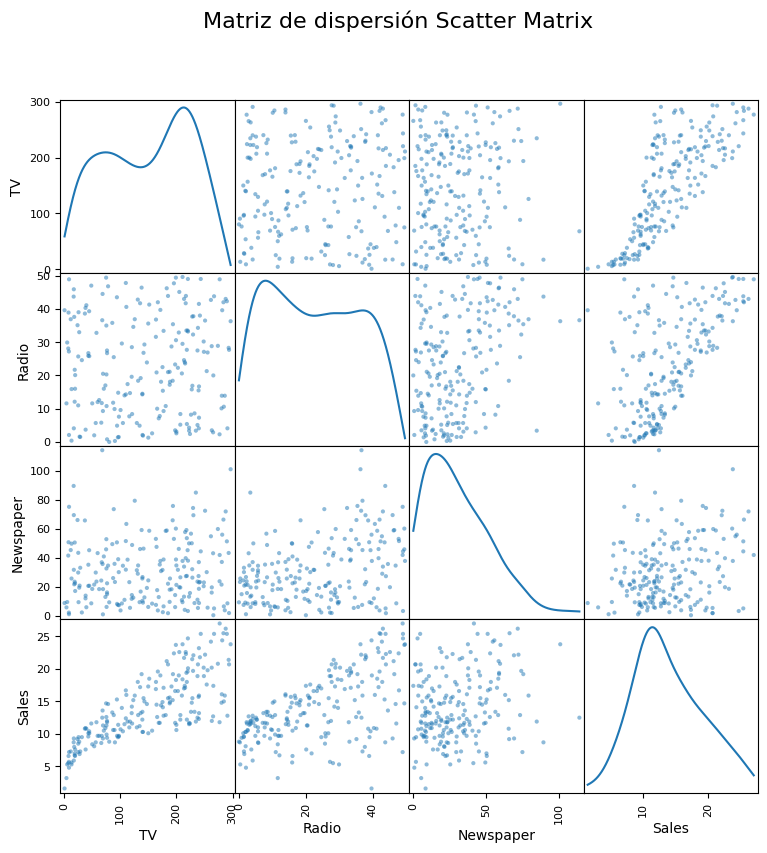

In [124]:
# Graficamos la matriz de dispersión scatter_matrix

scatter_matrix(df_filtro, figsize=(9, 9), diagonal= 'kde')
plt.suptitle('Matriz de dispersión Scatter Matrix', fontsize=16)
plt.show()


**Matriz de dispersión Scatter Matrix con lineas de Regresión**

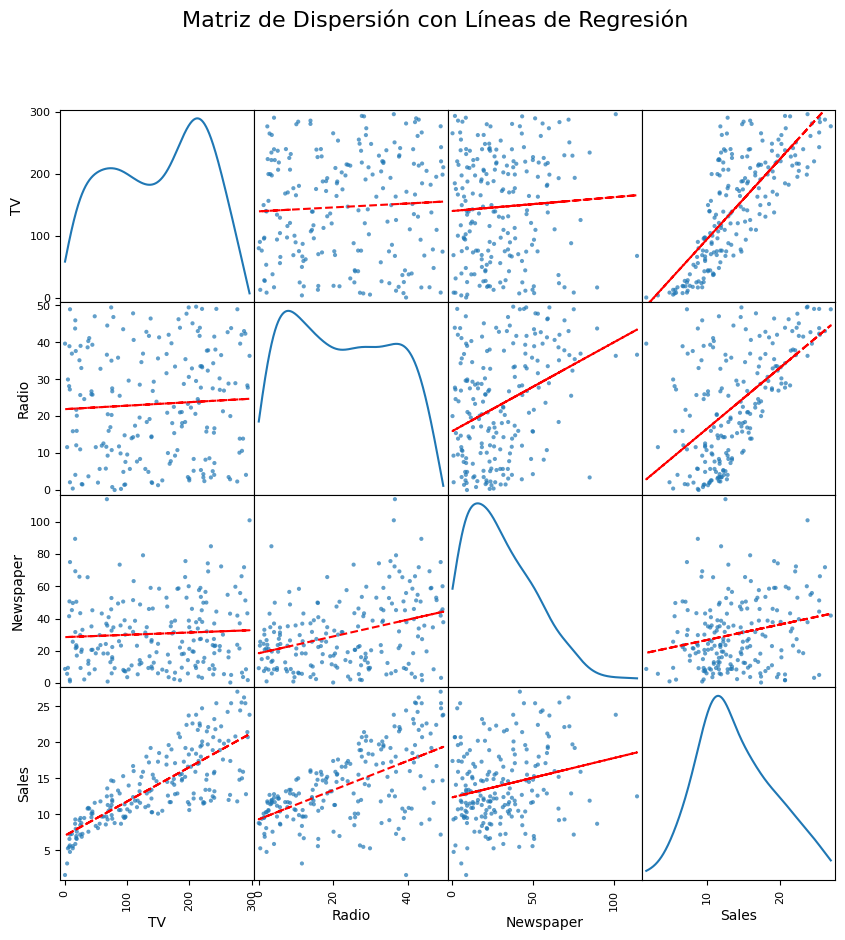

In [125]:
# Crear la scatter matrix
fig, axes = plt.subplots(nrows=len(df_filtro.columns), ncols=len(df_filtro.columns), figsize=(10, 10))
scatter_matrix(df_filtro, alpha=0.7, ax=axes, diagonal='kde')

# Trazar líneas de regresión en cada gráfico
for i in range(len(df_filtro.columns)):
    for j in range(len(df_filtro.columns)):
        if i != j:
            ax = axes[i, j]  # Acceder al eje correspondiente
            # Calcular la regresión lineal
            x = df_filtro.iloc[:, j]
            y = df_filtro.iloc[:, i]
            m, b = np.polyfit(x, y, 1)  # m: pendiente, b: intersección
            ax.plot(x, m * x + b, color='red', linestyle='--')  # Traza la línea de regresión

plt.suptitle('Matriz de Dispersión con Líneas de Regresión', fontsize=16)
plt.show()


In [126]:
# Estimando los coeficientes del modelo

b1 = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
b0 = np.mean(y)-b1*np.mean(x)

print('b0 = ', round(b0, 3))  # a 3 decimales
print('b1 = ', round(b1, 3))  # a 3 decimales

b0 =  12.351
b1 =  0.055


In [127]:
# Igualmente, podemos calcular el coeficiente del modelo de la siguiente manera:

beta1 = np.cov(x, y)[0, 1]/np.var(x, ddof = 1)
beta0 = np.mean(y)-beta1*np.mean(x)
print(f"beta0: {round(beta0, 3)}, beta1: {round(beta1, 3)}")

beta0: 12.351, beta1: 0.055


Recta de regresión estimada:
. $\hat{y} = 7.033 +0.048 * x  $


beta0: 7.033, beta1: 0.048


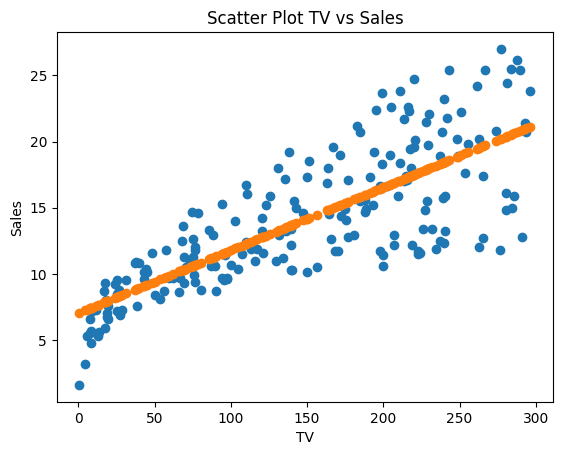

beta0: 9.312, beta1: 0.202


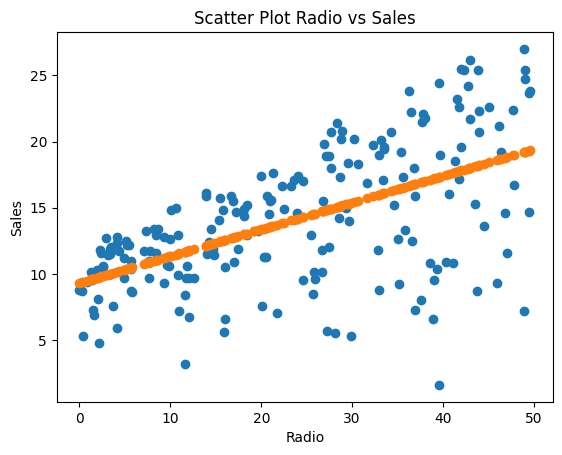

beta0: 12.351, beta1: 0.055


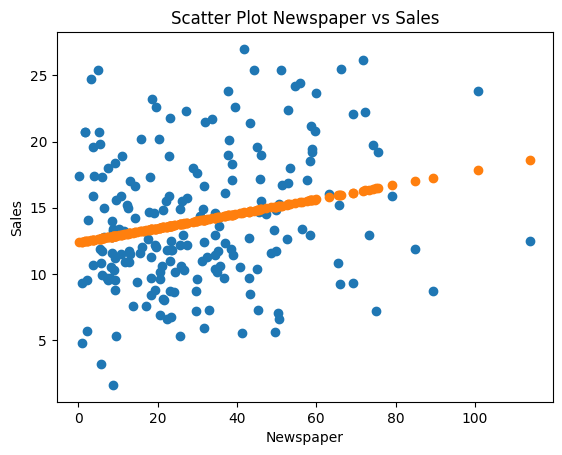

In [128]:
# Definimos nuestras variables SALES VS TV

x = df_filtro["TV"]. values
y = df_filtro["Sales"]. values

# Calculamos la regla de regresión

b1 = np.cov(x, y)[0, 1] / np.var(x, ddof = 1)  # ddof para que haga la estimación de la varianza de forma muestral y no poblacional
b0 = np.mean(y) - b1 * np.mean(x)
print(f"beta0: {round(  b0, 3)}, beta1: {round(b1,3)}")

# Estimamos el y_hat

y_hat = b0 + b1 * x

plt.scatter(x, y)
plt.scatter(x, y_hat)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot TV vs Sales')
plt.show()

#====================================================================================================================================

# Definimos nuestras variables SALES VS RADIO

x = df_filtro['Radio']. values
y = df_filtro['Sales']. values

# Calculamos la regla de regresión

b1 = np.cov(x, y)[0, 1] / np.var(x, ddof = 1)  # ddof para que haga la estimación de la varianza de forma muestral y no poblacional
b0 = np.mean(y) - b1 * np.mean(x)
print(f"beta0: {round(  b0, 3)}, beta1: {round(b1,3)}")

# Estimamos el y_hat

y_hat = b0 + b1 * x

plt.scatter(x, y)
plt.scatter(x, y_hat)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Scatter Plot Radio vs Sales')
plt.show()

#====================================================================================================================================

# Definimos nuestras variables SALES VS NEWSPAPER

x = df_filtro['Newspaper']. values
y = df_filtro['Sales']. values

# Calculamos la regla de regresión

b1 = np.cov(x, y)[0, 1] / np.var(x, ddof = 1)  # ddof para que haga la estimación de la varianza de forma muestral y no poblacional
b0 = np.mean(y) - b1 * np.mean(x)
print(f"beta0: {round(  b0, 3)}, beta1: {round(b1,3)}")

# Estimamos el y_hat

y_hat = b0 + b1 * x

plt.scatter(x, y)
plt.scatter(x, y_hat)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Scatter Plot Newspaper vs Sales')
plt.show()


# **Interpretación de los gráficos de las variables 2 a 2.**

Este coeficiente indica el cambio esperado en la variable dependiente por cada unidad de aumento en la variable independiente

**Sales VS TV:** Por cada aumento de una unidad en la variable 'X' (TV) se espera que en la variable 'Y' (Sales) aumente en 0.048 unidades.

**Sales VS Radio:** Por cada aumento de una unidad en la variable 'X' (Radio) se espera que en la variable 'Y' (Sales) aumente en 0.202 unidades.

**Sales VS Newspaper:** Por cada aumento de una unidad en la variable 'X' (Newspaper) se espera que en la variable 'Y' (Sales) aumente en 0.055 unidades.


# ***2)  CALCULAR COEFICIENTE DE CORRELACIÓN.***

***Coeficiente de correlación de Pearson***
$$
r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}}
$$

In [60]:

# Definimos las variables a evaluar

x = df_filtro['TV']. values
y = df_filtro['Sales']. values

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos la cantidad de registros del df (n)
n = len(df_filtro)

#///////////////////////////////////////////////////////////////////////////////////////////

# Multiplicamos los valores de las variables, ejemplo (x1 * y1), (x2 * y2) ..... (xn * yn)

# Calculamos (∑xy)

sumatoria_xy = df_filtro['TV'] * df_filtro['Sales']

# Sumamos los productos

sum_x_por_y = sumatoria_xy.sum()

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos n(∑xy)

n_por_sum_xy = n * sum_x_por_y

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos ∑x

sum_x = df_filtro['TV'].sum()

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos ∑y

sum_y = df_filtro['Sales'].sum()

#//////////////////////////////////////////////////////////////////////////////////////////
#==========================================================================================
#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos ∑x^2

sumx_cuadrado = (df_filtro['TV'] ** 2).sum()

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos (∑x)^2

sum_x_cuadrado = (sum_x)**2

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos n * ∑x^2

n_por_sum_x_cuadrado = n * sumx_cuadrado

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos ∑y^2

sumy_cuadrado = (df_filtro['Sales'] ** 2).sum()

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos (∑y)^2

sum_y_cuadrado = (sum_y)**2

#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos n * ∑y^2

n_por_sum_y_cuadrado = n * sumy_cuadrado


#//////////////////////////////////////////////////////////////////////////////////////////
#==========================================================================================
#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos la ∑x * ∑y

sumx_por_sumy = sum_x * sum_y

# Calculamos n (∑xy) - (∑x)(∑y)

n_por_sum_xy_menos_sum_x_por_sum_y = n_por_sum_xy - sumx_por_sumy

#//////////////////////////////////////////////////////////////////////////////////////////
#==========================================================================================
#//////////////////////////////////////////////////////////////////////////////////////////

# Calculamos   n * ∑x2 − (∑x)2

n_por_sum_x_cuadrado_menos_sum_x_cuadrado = (n * sumx_cuadrado) - sum_x_cuadrado

#///////////////////////////////////////////////////////////////////////////////////////////

# Calculamos   n * ∑y2 − (∑y)2

n_por_sum_y_cuadrado_menos_sum_y_cuadrado = (n * sumy_cuadrado) - sum_y_cuadrado

#///////////////////////////////////////////////////////////////////////////////////////////
#==========================================================================================
#///////////////////////////////////////////////////////////////////////////////////////////

# Calculo de n * (∑xy) − (∑x)(∑y)

n_por_sum_xy_menos_sum_x_por_sum_y = n_por_sum_xy - sumx_por_sumy

#///////////////////////////////////////////////////////////////////////////////////////////

# calculo de [n∑x2−(∑x)2] [n∑y2−(∑y)2]

n_por_sum_x_cuadrado_menos_sum_x_cuadrado_por_n_por_sum_y_cuadrado_menos_sum_y_cuadrado = (n_por_sum_x_cuadrado_menos_sum_x_cuadrado * n_por_sum_y_cuadrado_menos_sum_y_cuadrado)


# Mostrar el resultado
#===================================================
#===================================================

print(f"n = {n}")
print(f"(∑xy) = {sum_x_por_y}")
print(f"n(∑xy) = {n_por_sum_xy}")

print(f"(∑x) = {sum_x}")
print(f"(∑y) = {sum_y}")

#===================================================
#===================================================

print(f"∑x^2 = {sumx_cuadrado}")
print(f"(∑x)^2 = {sum_x_cuadrado}")
print(f"n * ∑x^2 = {n_por_sum_x_cuadrado}")

print(f"∑y^2 = {sumy_cuadrado}")
print(f"(∑y)^2 = {sum_y_cuadrado}")
print(f"n * ∑y^2 = {n_por_sum_y_cuadrado}")

#===================================================
#===================================================

print(f"(∑x)(∑y) = {sumx_por_sumy}")
print(f"n∑x^2−(∑x)^2) = {n_por_sum_x_cuadrado_menos_sum_x_cuadrado}")
print(f"n∑y^2−(∑y)^2) = {n_por_sum_y_cuadrado_menos_sum_y_cuadrado}")

#===================================================
#===================================================

print(f"n(∑xy) − (∑x)(∑y) = {n_por_sum_xy_menos_sum_x_por_sum_y}")
print(f"n∑x^2−(∑x)^2) * n∑y^2−(∑y)^2 = {n_por_sum_x_cuadrado_menos_sum_x_cuadrado_por_n_por_sum_y_cuadrado_menos_sum_y_cuadrado}")


n = 200
(∑xy) = 482108.33999999997
n(∑xy) = 96421668.0
(∑x) = 29408.5
(∑y) = 2804.5
∑x^2 = 5791118.39
(∑x)^2 = 864859872.25
n * ∑x^2 = 1158223678.0
∑y^2 = 44743.25
(∑y)^2 = 7865220.25
n * ∑y^2 = 8948650.0
(∑x)(∑y) = 82476138.25
n∑x^2−(∑x)^2) = 293363805.75
n∑y^2−(∑y)^2) = 1083429.75
n(∑xy) − (∑x)(∑y) = 13945529.75
n∑x^2−(∑x)^2) * n∑y^2−(∑y)^2 = 317839074722771.06


***Coeficiente de correlación de Pearson***

$$
r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}}
$$    .



---


**Reemplazamos la fórmula con su valor calculado**


---
.


$$
r = \frac{200(482108.339999999977) - (29408.5)(2804.5)}{\sqrt{[200(5791118.39) - (29408.5)^2][200(44743.25) - (2804.5)^2]}}
$$    
.

$$
r = \frac{96421668.0 - 82476138.25}{\sqrt{[1158223678.0 - 864859872.25][8948650.0 - 7865220.25]}}
$$    
.
$$
r = \frac{13945529.75}{\sqrt{[293363805.75][1083429.75]}}
$$    
.
$$
r = \frac{13945529.75}{\sqrt{[317839074722771.06]}}
$$   
.
$$
r = \frac{13945529.75}{17828041.81}
$$  
.
$$
r = 0.7822244248
$$  


**Ahora, vamos a comprobar si coincide con el valor calculado por medio de la función de NumPy => np.corrcoef(x, y)[0, 1]**

In [17]:
# agregamos las variables TV VS SALES

x = df_filtro['TV']. values
y = df_filtro['Sales']. values

# Calcular el coeficiente de correlación
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print(f"Coeficiente de correlación: {correlation_coefficient}")

Coeficiente de correlación: 0.7822244248616061


**Igualmente, vamos a calcular el coeficiente de correlación para las variables RADIO y NEWSPAPER**

In [18]:
# agregamos las variables RADIO VS SALES

x = df_filtro['Radio']. values
y = df_filtro['Sales']. values

# Calcular el coeficiente de correlación
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print(f"Coeficiente de correlación: {correlation_coefficient}")

Coeficiente de correlación: 0.5762225745710551


In [19]:
# agregamos las variables NEWSPAPER VS SALES

x = df_filtro['Newspaper']. values
y = df_filtro['Sales']. values

# Calcular el coeficiente de correlación
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print(f"Coeficiente de correlación: {correlation_coefficient}")

Coeficiente de correlación: 0.22829902637616528


***Con los resultados obtenidos en el cálculo del coeficiente de correlación podemos concluir que:***


**TV vs SALES :** Un coeficiente del 0.78 indica que existe una correlación positiva y muy fuerte entre las 2 variables, a medida que una variable aumenta, la otra variable tambien tiende a aumentar.

**RADIO vs SALES :** Un coeficiente del 0.57 indica que existe una correlación positiva moderada entre las 2 variables, a medida que una variable aumenta, la otra variable tambien tiende a aumentar aunque su relación no es muy fuerte  como la de las variables TV vs SALES.

**NEWSPAPER vs SALES :** Un coeficiente del 0.23 indica que existe una correlación positiva muy débil entre las 2 variables, hay una ligera tendencia donde a medida que una variable aumenta, la otra variable tambien.

# **Graficamos mapa de calor de las correlaciones**

Vamos a comparar los mapas de calor que muestran las correlaciones entre los métodos de Pearson, Kendall y Spearman

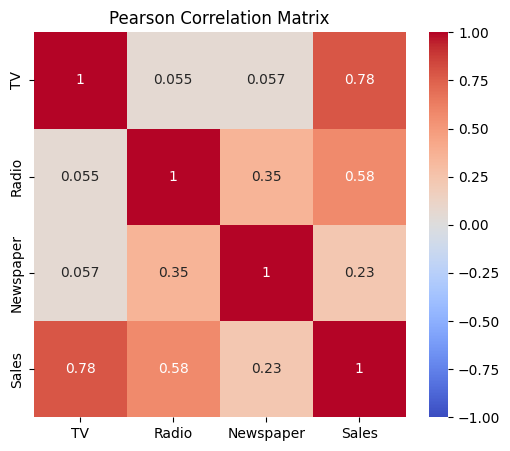

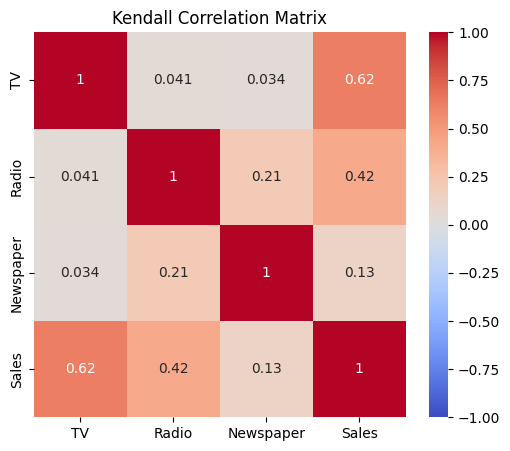

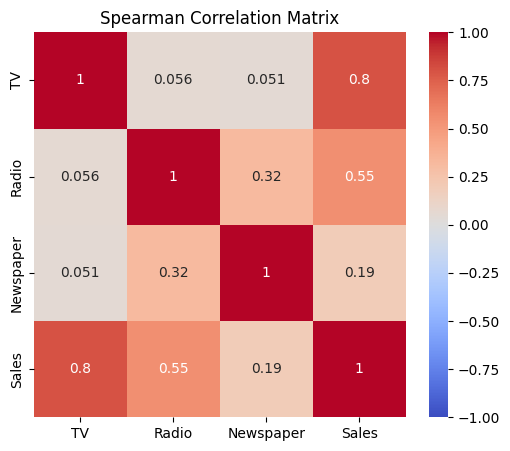

In [20]:
# Pearson correlation matrix
pearson_corr = df_filtro.corr(method='pearson')

# Kendall correlation matrix
kendall_corr = df_filtro.corr(method='kendall')

# Spearman correlation matrix
spearman_corr = df_filtro.corr(method='spearman')

#=========================================================================
# Imprimimos las matrices de correlación

plt.figure(figsize=(6, 5))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kendall Correlation Matrix')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix')
plt.show()

# **Interpretamos las estructuras de dependencia encontradas**

**Método Pearson:** Este método mide la relación lineal entre dos variables. Como resultado según el mapa de calor, podemos observar que la relación entre las variables Sales VS TV es positiva, es decir, hay una relación fuerte porque el valor es muy cercano a 1 (0.78). La relación Sales VS Radio tambien es positiva pero moderada porque su valor es mas lejano a 1 (0.58). La relación Sales VS Newspaper es positiva pero muy débil (0.23).

**Método Kendall:** Sales VS TV (0.62). La relación es positiva y moderadamente fuerte, eso quiere decir que, a medida que las ventas aumentan, tambien lo esta haciendo la inversión en televisión aunque no es tan fuerte como el método de Pearson. Sales VS Radio (0.42). La relación es positiva y moderada, esto nos indica que hay una relación más debil entre las ventas y publicidad en radio al compararlo con la publicidad en televisión. Sales VS Newspaper (0.13). Esta relación es positiva pero muy débil lo que indica que no hay mucha correlación entre las ventas y la publicidad en periódicos.

**Método Spearman:** Sales VS TV (0.8). Este resultado indica una relación positiva muy fuerte. Cuando las ventas aumentan, la inversión en televisión tambien tiende a aumentar de manera consistente. Sales VS Radio (0.55). La relación es positiva y moderada, hay una relación más débil entre las ventas y publicidad en radio al compararlo con la publicidad en televisión. Sales VS Newspaper (0.19). Esta relación es positiva pero muy débil lo que indica que no hay mucha correlación entre las ventas y la publicidad en periódicos, igual que con los métodos de Kendall y Pearson.

**Conclusiones**: Se puede observar que la relación Sales VS TV es la más fuerte en los 3 métodos utilizados (Pearson, Kendall,Spearman ) lo que nos indica que es un canal de publicidad muy efectivo para impulsar las ventas. La relación Sales VS Newspaper es la mas débil en cualquiera de los 3 métodos lo que indica que la publicidad en periódicos no tiene un impacto significativo en las ventas.

# ***3. ESCOGER UNA DE LAS 3 VARIABLES PARA MODELAR LAS VENTAS.***

# ***Variable seleccionada: TV***

**Ajustar el modelo de regresión lineal simple y encontrar la ecuación de la recta**

Debemos validar que el modelo cumpla con los supuestos de la regresión, es decir, los errores o residuales sean independientes, que exista normalidad de los errores comprobando que sigan una distribución normal,que la varianza de los errores sea constante (Homoscedasticidad) y después de ello, ajustamos el modelo, evaluamos el modelo usando la metrica R2



**Fórmula para calcular los residuales**:  $$
Residuales = y - \hat{y}
$$

y = valor observado.

$\hat{y}$  = valor predicho


Estos residuales son útiles para diagnosticar la calidad del ajuste del modelo y para detectar patrones no capturados por el modelo, como la heterocedasticidad o la no linealidad.

In [103]:
# Calculando nuestros residuales

# Estos residuos son las diferencias entre los valores observados y los valores predichos por el modelo, es decir, diferencias entre datos reales y predicciones del modelo

residuales = y - y_hat
print(residuales)


[  5.96383052  -4.41806581  -6.84163879   2.94904667  -2.64548402
  -9.25338945  -1.83669488   0.21415299  -7.60610017  -2.91090076
  -5.07498005   4.82982054  -6.75568226  -3.04519738   4.1327104
   7.15532802  -6.0864203    8.99671804  -2.05229077   1.20395475
   2.72798147  -1.13669488  -9.46418475   1.71563375  -3.65229077
  -1.41792249   1.95945989   2.29612098   5.29612098  -4.08288549
   6.68585108  -2.56256067  -4.39220002   5.032185    -3.256136
  -0.01629841  12.77512744  -0.15088167  -4.17113483   7.39841378
   2.52029102   2.63197002   8.25014535  -0.89530487  -6.21961823
   0.82576033  -3.70395068   9.83677061  -0.28059268  -4.66411309
  -2.84378828  -1.84830222   8.08274623   5.63810805   6.97897267
   8.06700702  -9.11570135  -0.0593125    9.38666312   5.53994711
  -5.42183938   8.85688044   1.85547134   1.1891709    4.06796238
  -3.10063086  -2.97173189   0.49072333   5.94696885   8.46094065
   3.83197002  -1.68517829  -4.60698387  -3.06330105   3.93211334
  -8.54097007

# *Supuestos del Modelo lineal*

***1). Calculamos la esperanza de los errores con  One-sample-t-test***

In [104]:
from scipy.stats import ttest_1samp, shapiro, kstest, anderson, probplot

# Media 0 en los errores de predicción lo que indica que el modelo está equilibrado en sus predicciones
# H0: E[e_i] = popmean vs H1: E[e_i] != popmean
# Para el supuesto del modelo lineal  popmean = 0

ttest_1samp(residuales, popmean = 0)  ## popmean se refiere al valor de la media que yo quiero testear

TtestResult(statistic=-5.0444051665737494e-15, pvalue=0.999999999999996, df=199)

***Observamos el resultado gráficamente***

In [105]:
np.mean(residuales)

-1.8118839761882555e-15

Media residuales: -0.0


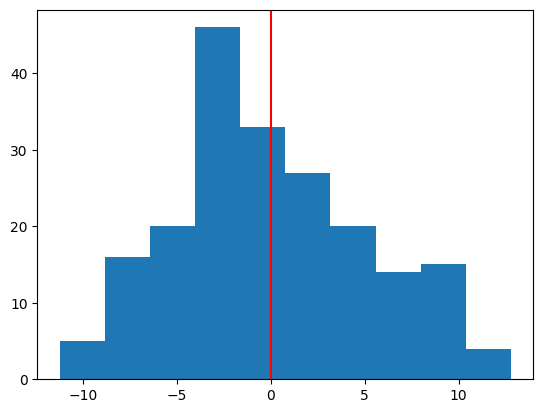

In [106]:
plt.hist(residuales)
plt.axvline(np.mean(residuales), color = 'red')
print(f"Media residuales: {round(np.mean(residuales), 3)}")
plt.show()

Cuando pvalue es menor que el valor de significancia (normalmente = 0.05) , se rechaza la hipótesis nula $H_0$ , lo que sugiere que hay evidencia suficiente para afirmar que la media de los errores es diferente de 0.

En este ejercicio, como pvalue es mayor que el nivel de significancia (0.05), no se rechaza la hipótesis nula  $H_0$ , lo que indica que no hay evidencia suficiente para afirmar que la media de los errores es diferente de 0.

**MEDIA 0  = CUMPLE**

***2). Test de Normalidad en los errores***

***- Shapiro-Wills***

In [111]:
# H0: e_i~Normal vs H1: e_i !~ Normal

print(shapiro(residuales))

ShapiroResult(statistic=0.981967849675721, pvalue=0.011395905060615854)


Según el test de shapiro-Wills, se rechaza normalidad de la muestra porque pvalue es inferior al nivel de significancia (0.05), esto indica que hay suficiente evidencia para concluir que los datos no siguen una distribución normal.

**NOTA:** Debemos tener en cuenta que el Test de shapiro-Wills es una prueba de normalidad especializada en muestras pequeñas (n < 50), por tal razón, ésta no es la prueba mas adecuada.


***Como el resultado del test de Shapiero-Wills no fue el esperado, debemos aplicar con otro test***

**- Kstest**

In [112]:
# H0: e_i~Normal vs H1: e_i !~ Normal
print(kstest(residuales, 'norm'))

KstestResult(statistic=0.3896150793155376, pvalue=7.487176846030359e-28, statistic_location=-1.5515503901683605, statistic_sign=1)


Según el test de kstest, se rechaza normalidad de la muestra porque pvalue es inferior al nivel de significancia (0.05), esto indica que hay suficiente evidencia para concluir que los datos no siguen una distribución normal.

**- Anderson Darling**

In [117]:
# H0: e_i~Normal vs H1: e_i !~ Normal
print(anderson(residuales, dist='norm'))

AndersonResult(statistic=1.1600961167241337, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-1.8118839761882555e-15, scale=5.079669074862087)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


Como el estadistico de prueba sobrepasa el valor critico y cae en región de rechazo, existe suficiente evidencia muestral para rechazar la hipótesis nula.

**Debido a que el test de Shapiro Wilks, Anderson-Darling y Kolmogorov-Smirnov rechazaron Normalidad, no podemos suponer una normalidad en los residuales.**

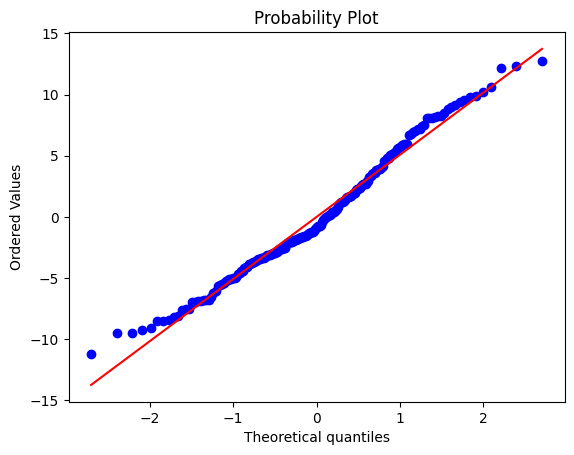

In [130]:
probplot(residuales, dist = "norm", plot = plt)
plt.show()

Se espera que la representación de los datos vayan con la misma forma de la recta, por tal razón, se evidencia en los test desarrollados anteriormente que hay rechazo de la hipótesis nula por una ligera curva o desviación que se evidencia en el gráfico.

***3). Independendia en los errores --- Test de autocorrelación de Durbin-Watson (DW test).***

**Interpretación del test Durbin-Watson**

1.9834337571567056


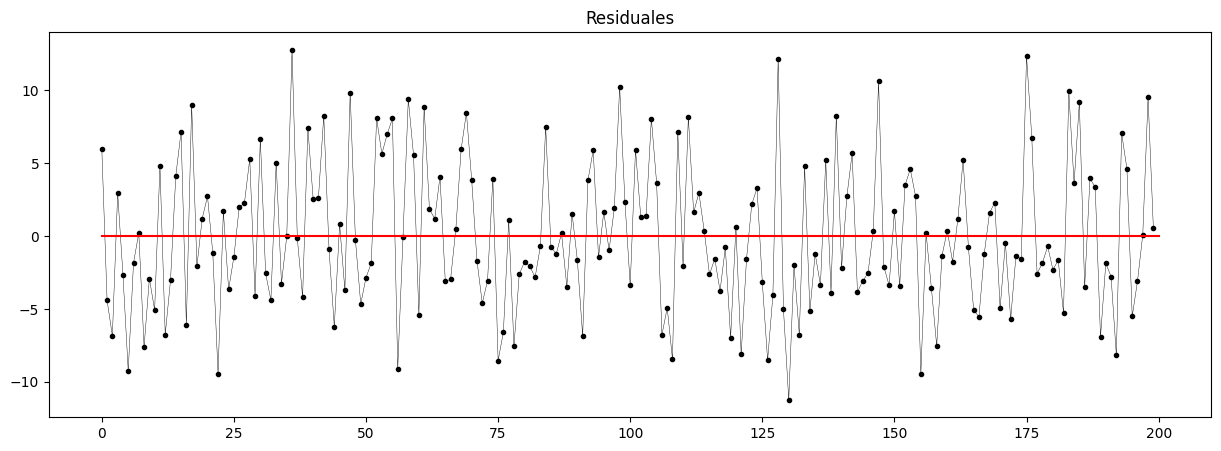

In [132]:
from statsmodels.stats.stattools import durbin_watson

## H0: Corr(e_i, e_i-1)=0 vs H1: corr(e_i, e_i-1) != 0

print(durbin_watson(residuales))

plt.figure(figsize = (15, 5))
plt.plot(residuales, '.-', color = "black", linewidth = 0.3)
plt.plot([0, len(residuales)], [0, 0], color = "red")
plt.title('Residuales')
plt.show()

### Independencia: CUMPLE Analíticamente, Gráficamente hay dudas

Si el valor DW esta en el intervalo [1.5, 2.5], no existe suficiente evidencia muestral para rechazar la hipótesis nula.

En este ejercicio el DW arroja un valor de 1.9834, el estadistico es menor a 2.5 y mayor a 1.5, por lo cual ,no existe suficiente evidencia muestral para rechazar la hipotesis nula, por lo tanto se puede suponer que hay independencia en los residuales.

***4). Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan***

In [136]:

from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

## H0: Homocedasticidad vs H1: Heterocedasticidad
LM, PLM, f_test, p_value = het_breuschpagan(residuales, sm.add_constant(x), robust = False)
p_value


0.11707253378080928

***Ajustamos el modelo***

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        02:53:28   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

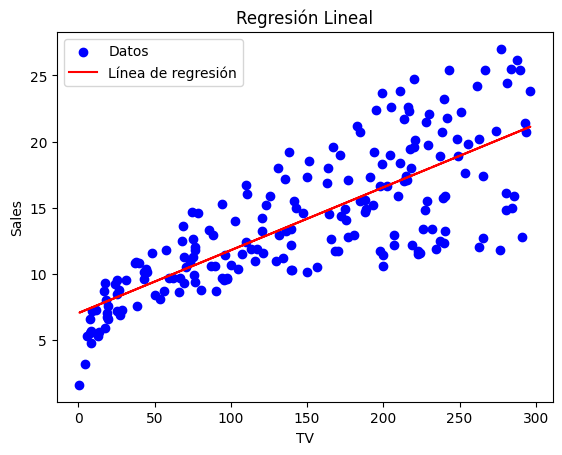

In [137]:

X = sm.add_constant(df_filtro['TV']) # variable independiente, predictora
Y = df_filtro['Sales'] # variable dependiente

# Para este ajuste, vamos a usar el método de minimos cuadrados ordinarios (OLS)

model = sm.OLS(Y, X).fit()
print(model.summary())

# Graficar los datos y la línea de regresión
plt.scatter(df_filtro['TV'], df_filtro['Sales'], color='blue', label='Datos')
plt.plot(df_filtro['TV'], model.predict(X), color='red', label='Línea de regresión')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

en un modelo de regresión lineal simple, el coeficiente de la variable independiente representa el cambio esperado en la variable dependiente por cada unidad de cambio en la variable independiente

In [138]:
# Encontramos la ecuación de la recta

# Los coeficientes del modelo nos dara la pendiente y la intersección.

intercepto = model.params[0]
pendiente = model.params[1]
print(f'Ecuación de la recta: Y = {intercepto:.2f} + {pendiente:.2f}X')

print(model.summary())


Ecuación de la recta: Y = 7.03 + 0.05X
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        02:54:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

<ipython-input-138-3399e694d35d>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercepto = model.params[0]
<ipython-input-138-3399e694d35d>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pendiente = model.params[1]


***¿Cuál es el valor del coeficiente de determinación  R2 .***

**¿Cómo se interpreta este valor?**

# **4. REALIZAR UNA PREDICCIÓN DEL ENTORNO A LA INVERSIÓN AL REALIZAR 5 ANUNCIOS.**



# **¿Cuál es el intervalo de confianza del 95% para la predicción?**

In [143]:
# Valor para el que queremos hacer la predicción

df_prd = pd.DataFrame({'const': 1, 'TV': [5]}) # 5 anuncios en TV

# Realizar la predicción y obtener el intervalo de confianza

prediccion = model.get_prediction(df_prd)
resumen_prediccion = prediccion.summary_frame(alpha=0.05) # Intervalo de confianza del 95%

# Mostrar resultados
print(f"Predicción de ventas: {resumen_prediccion['mean'][0]:.2f}")
print(f"Intervalo de confianza del 95%: ({resumen_prediccion['mean_ci_lower'][0]:.2f}, {resumen_prediccion['mean_ci_upper'][0]:.2f})")



Predicción de ventas: 7.27
Intervalo de confianza del 95%: (6.39, 8.15)
